In [1]:
#logistic regression

#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#importing the dataset
ds = pd.read_csv('Social_Network_Ads.csv')
x = ds.iloc[:, [2,3]].values
y = ds.iloc[:, 4].values

#splitting the dataset into the training set and test set

from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

#feature scaling

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

#fitting logistic regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

# predicting the test set results

y_pred = classifier.predict(x_test)

# making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

C:\Users\mira\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\mira\Anaconda2\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


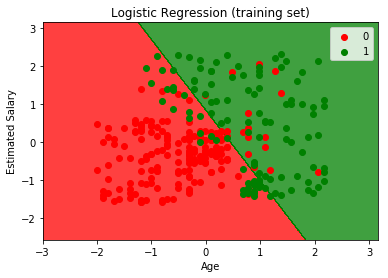

In [25]:
# Visualising the training set results

from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start= x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step= 0.01), 
                     np.arange(start= x_set[:, 1].min() - 1, stop = x_set[:, 0].max() + 1, step= 0.01)
                    )
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
               c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

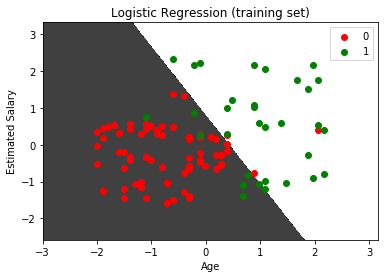

In [49]:
# visualising the test set results

from matplotlib.colors import ListedColormap

x_set, y_set = x_test, y_test

x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop= x_set[:, 0].max() + 1, step= 0.01), 
                     np.arange(start = x_set[:, 1].min() - 1, stop= x_set[:, 1].max() + 1, step= 0.01)
                    )
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.75, cmap = ListedColormap(('Black', 'White')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
               c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [44]:
np.unique(y_set)

array([0, 1], dtype=int64)